## Sinal giroscópio triaxial


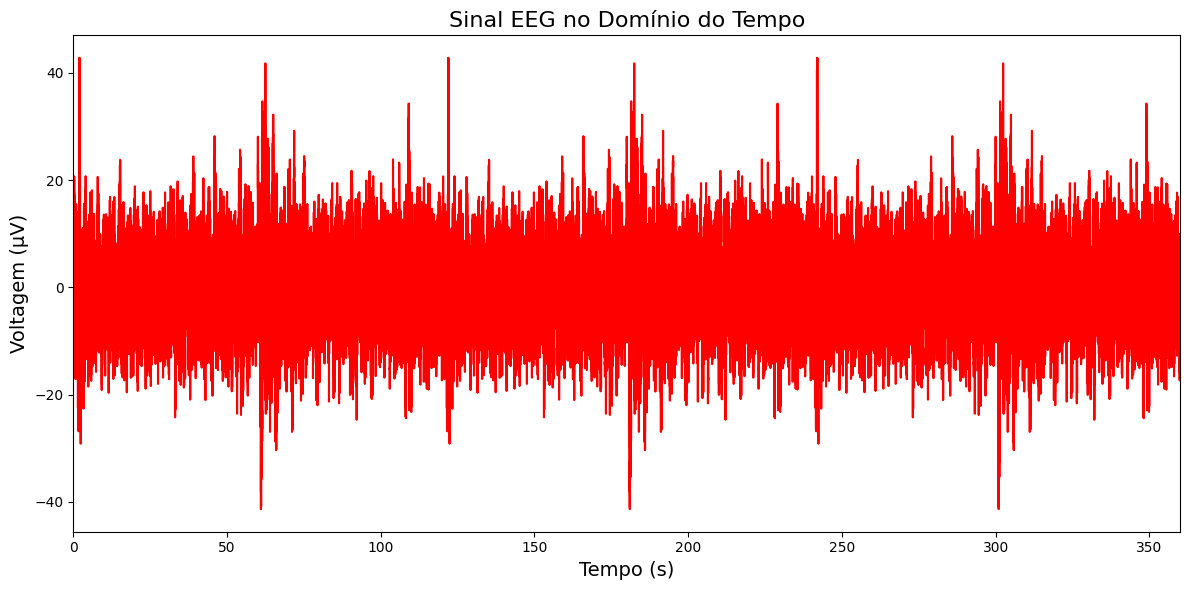

In [19]:
# import numpy as np
# import scipy.io as sio
# import scipy.fftpack
# import matplotlib.pyplot as plt

# # Carregar os dados do arquivo .mat
# matdat = sio.loadmat('EEGrestingState.mat')
# eegdata = matdat['eegdata'][0]
# srate = matdat['srate'][0][0]

# # Triplicar os dados
# eegdata_triplicado = np.concatenate([eegdata, eegdata, eegdata])
# srate_triplicado = srate

# # Salvar os dados triplicados em um novo arquivo .mat
# matdat_triplicado = {'eegdata': eegdata_triplicado, 'srate': srate_triplicado}
# sio.savemat('EEGrestingState_triplicado.mat', matdat_triplicado)

# # Vetor de tempo para os dados triplicados
# N = len(eegdata_triplicado)
# timevec_triplicado = np.arange(0, N) / srate_triplicado

# # Plotar os dados triplicados
# plt.figure(figsize=(12, 6))
# plt.plot(timevec_triplicado, eegdata_triplicado, 'r')  # Alteração da cor para vermelho
# plt.xlabel('Tempo (s)')
# plt.ylabel('Voltagem (µV)')
# plt.title('Sinal EEG no Domínio do Tempo')
# plt.show()

# # Calcular a transformada de Fourier dos dados triplicados
# signalX_triplicado = scipy.fftpack.fft(eegdata_triplicado)
# signalAmp_triplicado = 2 * np.abs(signalX_triplicado) / N

# # Vetor de frequências em Hz para os dados triplicados
# hz_triplicado = np.linspace(0, srate_triplicado / 2, int(np.floor(N / 2) + 1))

# # Plotar o espectro de amplitude dos dados triplicados
# plt.figure(figsize=(10, 6))
# plt.plot(hz_triplicado, signalAmp_triplicado[:len(hz_triplicado)], 'b')  # Alteração da cor para azul
# plt.title('Espectro de Amplitude do Sinal EEG')
# plt.xlabel('Frequência (Hz)')
# plt.ylabel('Amplitude (µV)')
# plt.tight_layout()
# plt.show()

import numpy as np
import scipy.io as sio
import scipy.fftpack
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState.mat')
eegdata = matdat['eegdata'][0]
srate = matdat['srate'][0][0]

# Triplicar os dados
eegdata_triplicado = np.concatenate([eegdata, eegdata, eegdata])
srate_triplicado = srate

# Salvar os dados triplicados em um novo arquivo .mat
matdat_triplicado = {'eegdata': eegdata_triplicado, 'srate': srate_triplicado}
sio.savemat('EEGrestingState_triplicado.mat', matdat_triplicado)

# Vetor de tempo para os dados triplicados
N = len(eegdata_triplicado)
timevec_triplicado = np.arange(0, N) / srate_triplicado

# Plotar os dados triplicados
plt.figure(figsize=(12, 6))
plt.plot(timevec_triplicado, eegdata_triplicado, 'r')  # Alteração da cor para vermelho
plt.xlabel('Tempo (s)', fontsize=14)  # Aumento do tamanho da fonte do eixo x
plt.ylabel('Voltagem (µV)', fontsize=14)  # Aumento do tamanho da fonte do eixo y
plt.title('Sinal EEG no Domínio do Tempo', fontsize=16)  # Aumento do tamanho da fonte do título
plt.xlim(0, 360)
plt.tight_layout()
plt.show()

# # Calcular a transformada de Fourier dos dados triplicados
# signalX_triplicado = scipy.fftpack.fft(eegdata_triplicado)
# signalAmp_triplicado = 2 * np.abs(signalX_triplicado) / N

# # Vetor de frequências em Hz para os dados triplicados
# hz_triplicado = np.linspace(0, srate_triplicado / 2, int(np.floor(N / 2) + 1))

# # Plotar o espectro de amplitude dos dados triplicados
# plt.figure(figsize=(10, 6))
# plt.plot(hz_triplicado, signalAmp_triplicado[:len(hz_triplicado)], 'b')  # Alteração da cor para azul
# plt.title('Espectro de Amplitude do Sinal EEG', fontsize=16)  # Aumento do tamanho da fonte do título
# plt.xlabel('Frequência (Hz)', fontsize=14)  # Aumento do tamanho da fonte do eixo x
# plt.ylabel('Amplitude (µV)', fontsize=14)  # Aumento do tamanho da fonte do eixo y
# plt.tight_layout()
# plt.show()



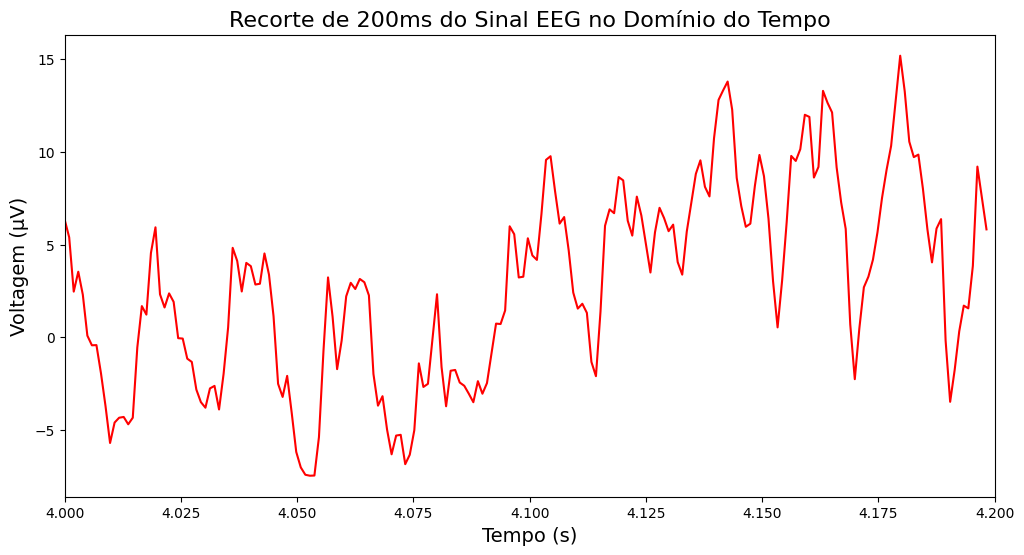

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState_triplicado.mat')
eegdata_triplicado = matdat['eegdata'][0]
srate_triplicado = matdat['srate'][0][0]

# Calcular o número de pontos correspondentes a 200 milissegundos
N_200ms = int(0.2 * srate_triplicado)

# Selecionar o recorte de 200 milissegundos dos dados triplicados
eegdata_200ms = eegdata_triplicado[:N_200ms]
timevec_200ms = np.arange(0, N_200ms) / srate_triplicado

# Plotar o vigésimo frame mais adiante no tempo (4 segundos mais tarde)
plt.figure(figsize=(12, 6))
plt.plot(timevec_200ms + 4, eegdata_200ms, 'r')  # Alteração do tempo de plotagem
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Voltagem (µV)', fontsize=14)
plt.title('Recorte de 200ms do Sinal EEG no Domínio do Tempo', fontsize=16)
plt.xlim(4, 4.2)  # Ajustando o limite do eixo x para 4 segundos
plt.show()


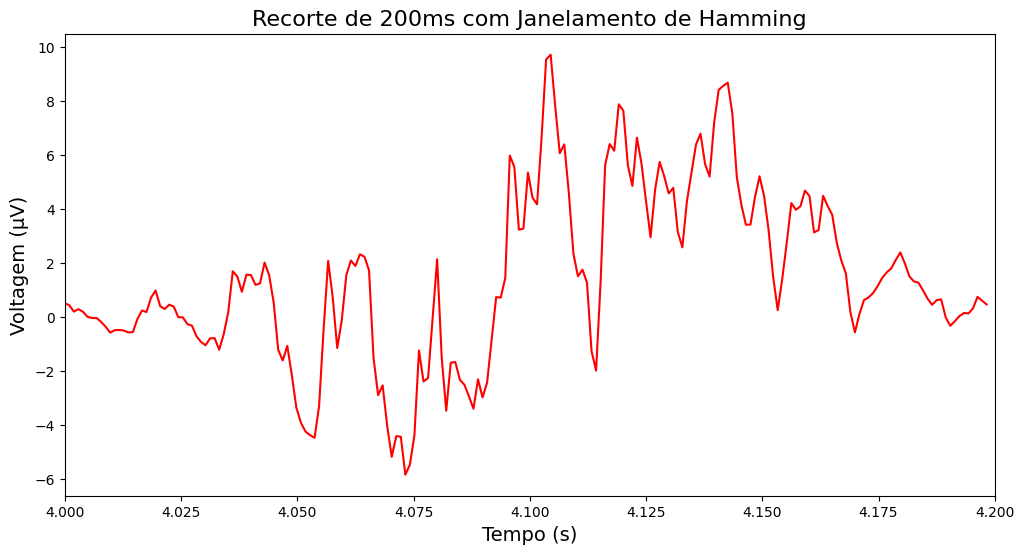

In [7]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Função para calcular a janela de Hamming
def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState_triplicado.mat')
eegdata_triplicado = matdat['eegdata'][0]
srate_triplicado = matdat['srate'][0][0]

# Calcular o número de pontos correspondentes a 200 milissegundos
N_200ms = int(0.2 * srate_triplicado)

# Selecionar o recorte de 200 milissegundos dos dados triplicados
eegdata_200ms = eegdata_triplicado[:N_200ms]
timevec_200ms = np.arange(0, N_200ms) / srate_triplicado

# Criar a janela de Hamming
hamming_window_200ms = hamming_window(N_200ms)

# Aplicar o janelamento ponto a ponto
eegdata_hamming = eegdata_200ms * hamming_window_200ms

# Plotar o sinal EEG janelado
plt.figure(figsize=(12, 6))
plt.plot(timevec_200ms + 4, eegdata_hamming, 'r')  # Alteração do tempo de plotagem
plt.xlabel('Tempo (s)', fontsize=14)
plt.ylabel('Voltagem (µV)', fontsize=14)
plt.title('Recorte de 200ms com Janelamento de Hamming', fontsize=16)
plt.xlim(4, 4.2)  # Ajustando o limite do eixo x para 4 segundos
plt.show()


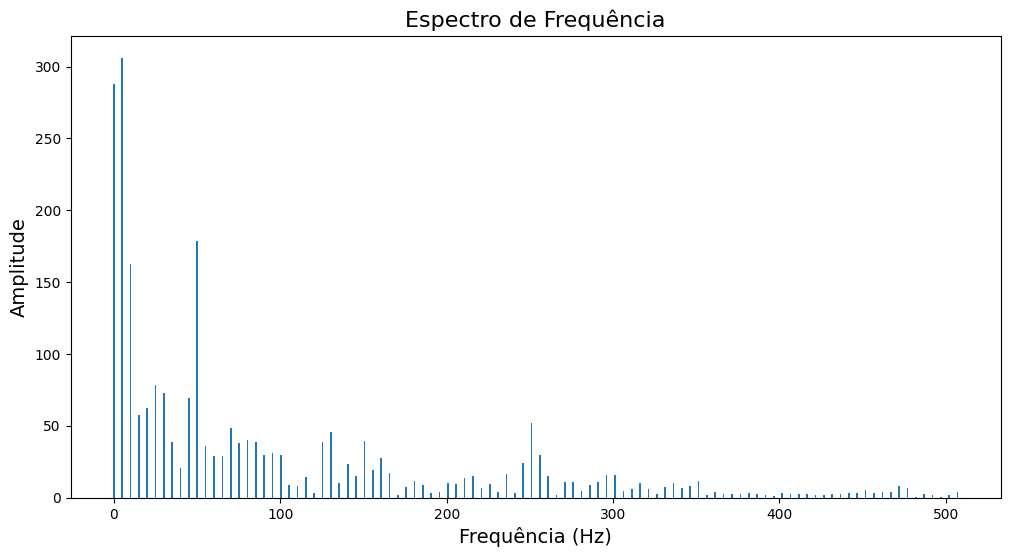

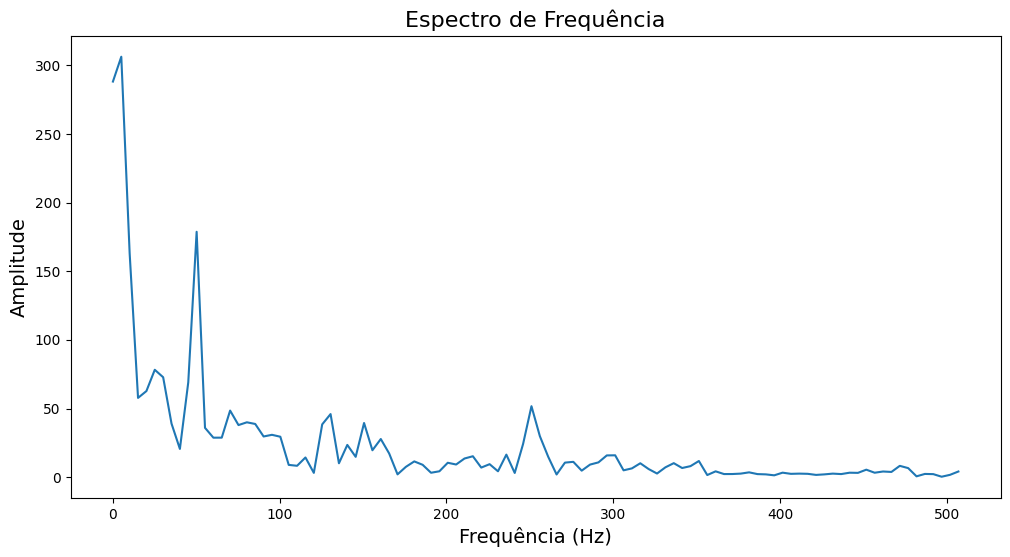

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Função para calcular a janela de Hamming
def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState_triplicado.mat')
eegdata_triplicado = matdat['eegdata'][0]
srate_triplicado = matdat['srate'][0][0]

# Calcular o número de pontos correspondentes a 200 milissegundos
N_200ms = int(0.2 * srate_triplicado)

# Selecionar o recorte de 200 milissegundos dos dados triplicados
eegdata_200ms = eegdata_triplicado[:N_200ms]
timevec_200ms = np.arange(0, N_200ms) / srate_triplicado

# Criar a janela de Hamming
hamming_window_200ms = hamming_window(N_200ms)

# Aplicar o janelamento ponto a ponto
eegdata_hamming = eegdata_200ms * hamming_window_200ms

# Calcular a Transformada de Fourier
fft_values = np.fft.fft(eegdata_hamming)
freqs = np.fft.fftfreq(N_200ms, 1/srate_triplicado)

# Remover o espelhamento
fft_values = fft_values[:N_200ms//2]
freqs = freqs[:N_200ms//2]

# Plotar em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(freqs, np.abs(fft_values), width=1)
plt.xlabel('Frequência (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Espectro de Frequência', fontsize=16)
plt.show()

# Plotar em um gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(freqs, np.abs(fft_values))
plt.xlabel('Frequência (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Espectro de Frequência', fontsize=16)
plt.show()


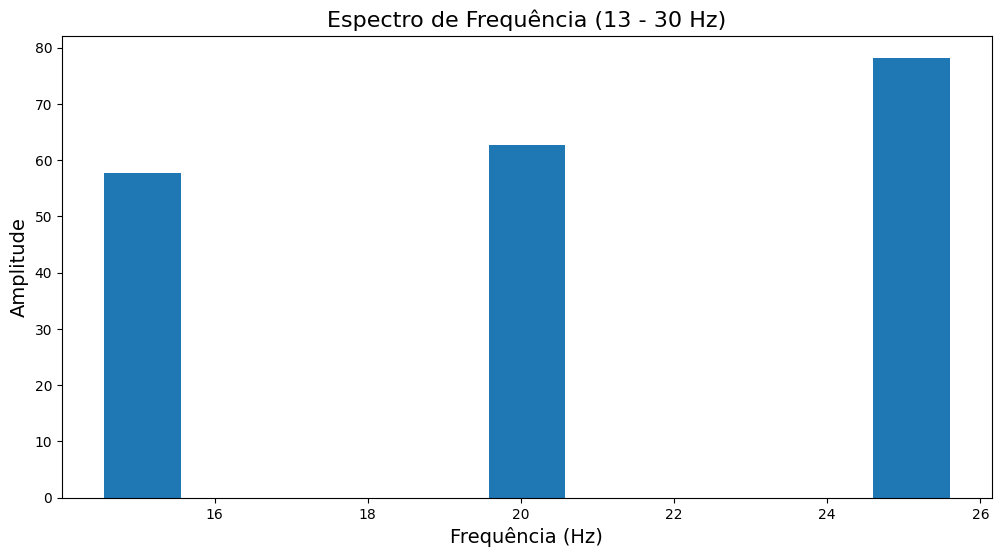

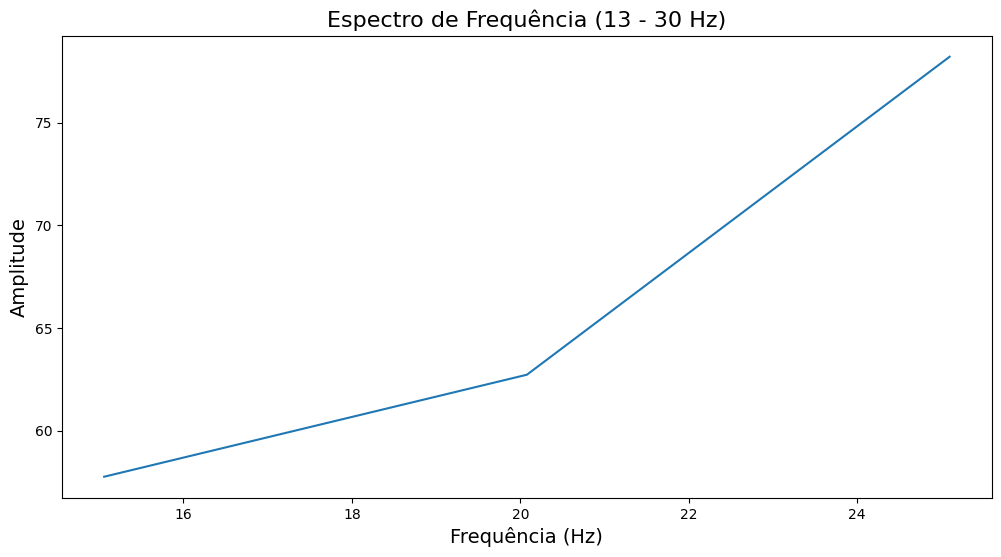

In [10]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Função para calcular a janela de Hamming
def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))

# Carregar os dados do arquivo .mat
matdat = sio.loadmat('EEGrestingState_triplicado.mat')
eegdata_triplicado = matdat['eegdata'][0]
srate_triplicado = matdat['srate'][0][0]

# Calcular o número de pontos correspondentes a 200 milissegundos
N_200ms = int(0.2 * srate_triplicado)

# Selecionar o recorte de 200 milissegundos dos dados triplicados
eegdata_200ms = eegdata_triplicado[:N_200ms]
timevec_200ms = np.arange(0, N_200ms) / srate_triplicado

# Criar a janela de Hamming
hamming_window_200ms = hamming_window(N_200ms)

# Aplicar o janelamento ponto a ponto
eegdata_hamming = eegdata_200ms * hamming_window_200ms

# Calcular a Transformada de Fourier
fft_values = np.fft.fft(eegdata_hamming)
freqs = np.fft.fftfreq(N_200ms, 1/srate_triplicado)

# Remover o espelhamento
fft_values = fft_values[:N_200ms//2]
freqs = freqs[:N_200ms//2]

# Filtrar frequências entre 13 Hz e 30 Hz
mask = (freqs >= 13) & (freqs <= 30)
filtered_freqs = freqs[mask]
filtered_fft_values = fft_values[mask]

# Plotar em um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(filtered_freqs, np.abs(filtered_fft_values), width=1)
plt.xlabel('Frequência (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Espectro de Frequência (13 - 30 Hz)', fontsize=16)
plt.show()

# Plotar em um gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(filtered_freqs, np.abs(filtered_fft_values))
plt.xlabel('Frequência (Hz)', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Espectro de Frequência (13 - 30 Hz)', fontsize=16)
plt.show()


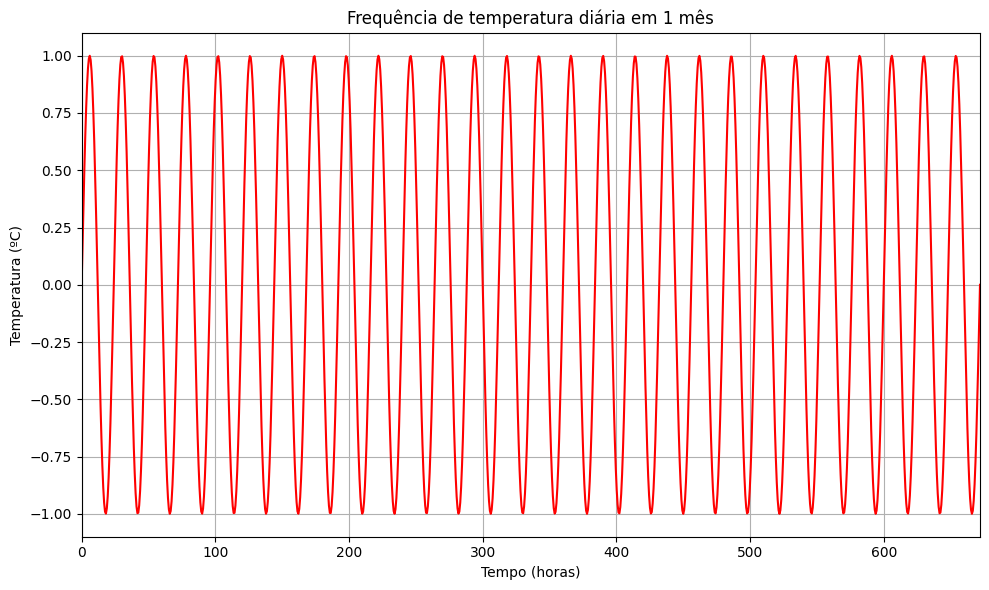

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 4 * 24  # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, frequencia_seno, color='red')
plt.xlabel('Tempo (horas)')
plt.ylabel('Temperatura (ºC)')
plt.title('Frequência de temperatura diária em 1 mês')
plt.grid(True)
plt.xlim(0, 672)
plt.tight_layout()
plt.show()


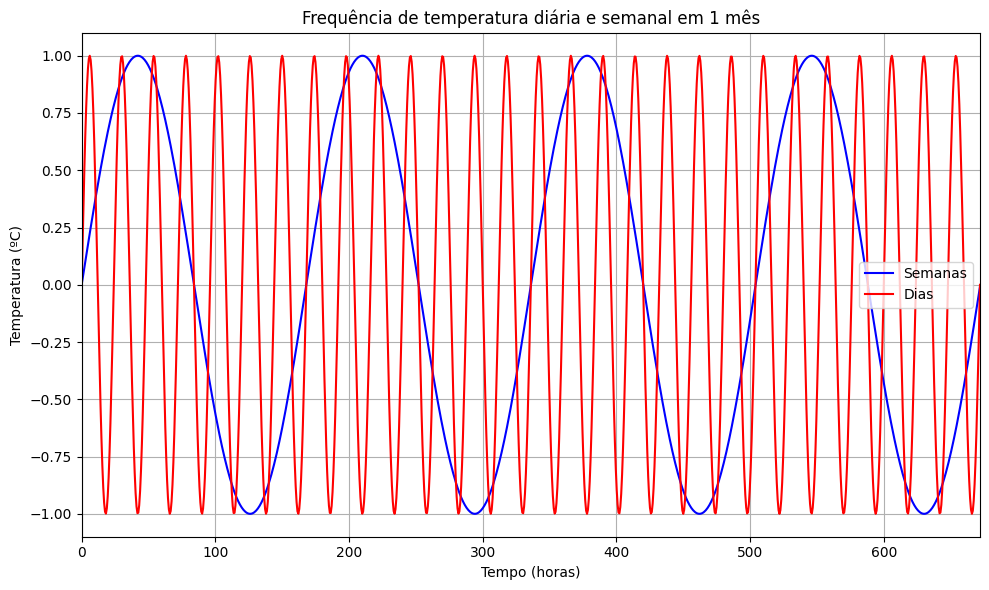

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 13.71 # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia * tempo)

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24  # Frequência de 1 ciclo a cada 24 horas
periodo = 7 * 4 * 24  # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_2 = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo, frequencia_seno_1, color='blue', label='Semanas')
plt.plot(tempo, frequencia_seno_2, color='red', label='Dias')
plt.xlabel('Tempo (horas)')
plt.ylabel('Temperatura (ºC)')
plt.title('Frequência de temperatura diária e semanal em 1 mês')
plt.grid(True)
plt.legend()
plt.xlim(0, 672)
plt.tight_layout()
plt.show()


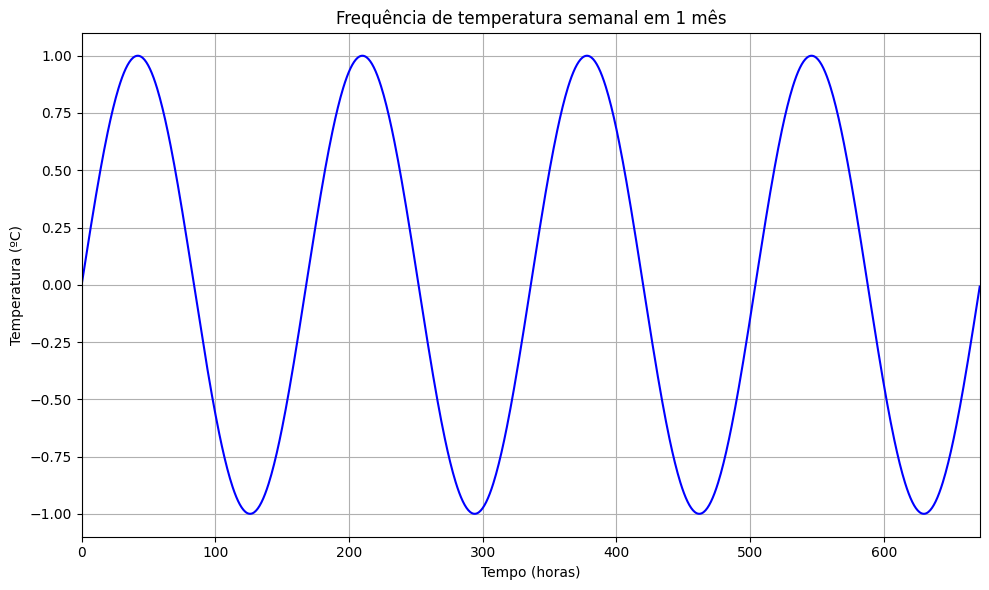

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo =  7 * 13.71 # Número total de horas (7 dias)
tempo = np.linspace(0, periodo, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno = np.sin(2 * np.pi * frequencia * tempo)

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo*7, frequencia_seno, color='blue')
plt.xlabel('Tempo (horas)')
plt.ylabel('Temperatura (ºC)')
plt.title('Frequência de temperatura semanal em 1 mês')
plt.grid(True)
plt.xlim(0, 672)
plt.tight_layout()
plt.show()


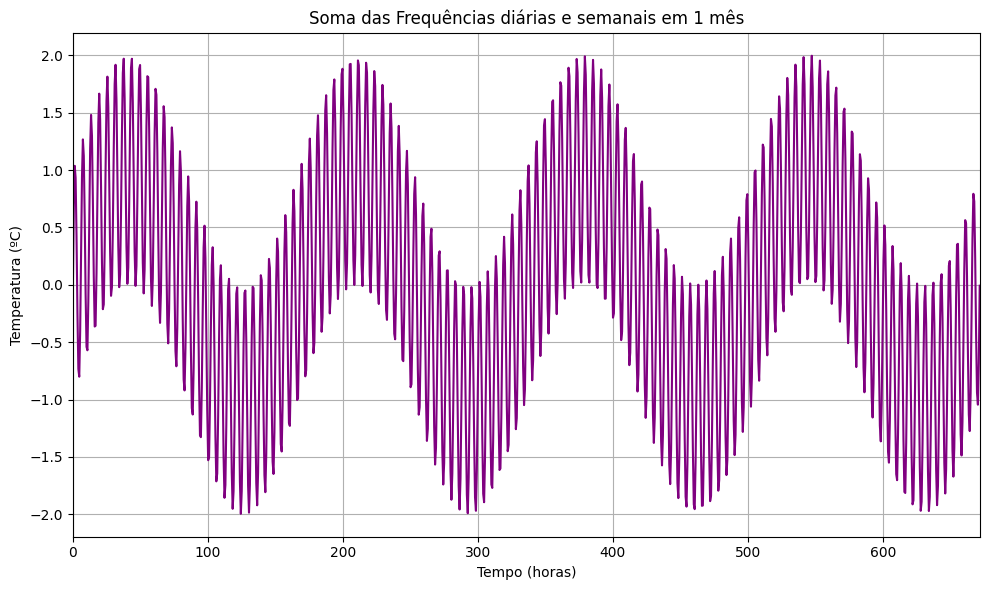

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia_1 = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo_1 = 7 * 13.71 # Número total de horas (7 dias)
tempo_1 = np.linspace(0, periodo_1, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia_1 * tempo_1)

# Frequência senoidal para representar alterações a cada 24 horas com 4 repetições
frequencia_2 = 1 /  24   # Frequência de 1 ciclo a cada 24 horas
periodo_2 =  4 * 672  # Número total de horas (4 ciclos)
tempo_2 = np.linspace(0, periodo_2, num=1000)  # Tempo ao longo de 4 ciclos
frequencia_seno_2 = np.sin(2 * np.pi * frequencia_2 * tempo_2)
# Soma das duas funções seno
soma = frequencia_seno_1 + frequencia_seno_2

# Plotagem do gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempo_1*7, soma, color='purple')
plt.xlabel('Tempo (horas)')
plt.ylabel('Temperatura (ºC)')
plt.title('Soma das Frequências diárias e semanais em 1 mês')
plt.grid(True)
plt.xlim(0, 672)
plt.tight_layout()
plt.show()


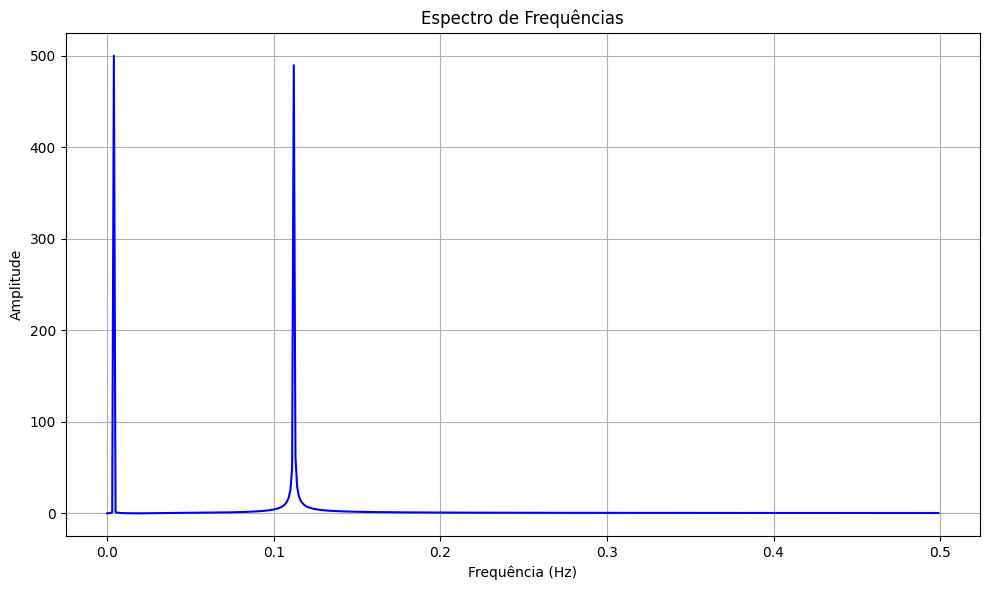

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Frequência senoidal para representar alterações a cada 24 horas com 7 repetições
frequencia_1 = 1 / 24   # Frequência de 1 ciclo a cada 24 horas
periodo_1 = 7 * 13.71 # Número total de horas (7 dias)
tempo_1 = np.linspace(0, periodo_1, num=1000)  # Tempo ao longo de 7 dias
frequencia_seno_1 = np.sin(2 * np.pi * frequencia_1 * tempo_1)

# Frequência senoidal para representar alterações a cada 24 horas com 4 repetições
frequencia_2 = 1 /  24   # Frequência de 1 ciclo a cada 24 horas
periodo_2 =  4 * 672  # Número total de horas (4 ciclos)
tempo_2 = np.linspace(0, periodo_2, num=1000)  # Tempo ao longo de 4 ciclos
frequencia_seno_2 = np.sin(2 * np.pi * frequencia_2 * tempo_2)

# Soma das duas funções seno
soma = frequencia_seno_1 + frequencia_seno_2

# Transformada de Fourier
fourier = np.fft.fft(soma)
frequencias = np.fft.fftfreq(len(soma))

# Frequências correspondentes
frequencias_positivas = frequencias[:len(frequencias)//2]  # Apenas a parte positiva do espectro

# Encontrando índices correspondentes às duas frequências
indice_frequencia_1 = np.abs(frequencias_positivas - frequencia_1).argmin()
indice_frequencia_2 = np.abs(frequencias_positivas - frequencia_2).argmin()

# Plotagem do espectro de frequências
plt.figure(figsize=(10, 6))
plt.plot(frequencias_positivas, np.abs(fourier[:len(frequencias)//2]), color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.title('Espectro de Frequências')
plt.grid(True)
plt.tight_layout()
plt.show()
